<a href="https://colab.research.google.com/github/ash12hub/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/Ashwin_Raghav_Swamy_LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

## Get LendingClub data

[Source](https://www.lendingclub.com/info/download-data.action)

In [50]:
! ls

LoanStats_2018Q4.csv  LoanStats_2018Q4.csv.zip	sample_data  tmp.csv


In [51]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-05-03 02:26:15--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip.1’

LoanStats_2018Q4.cs     [                <=> ]  21.40M   810KB/s    in 28s     

2019-05-03 02:26:43 (796 KB/s) - ‘LoanStats_2018Q4.csv.zip.1’ saved [22444881]



In [52]:
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
replace LoanStats_2018Q4.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: yes
  inflating: LoanStats_2018Q4.csv    


In [53]:
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

## Load LendingClub data

pandas documentation
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
- [`options.display`](https://pandas.pydata.org/pandas-docs/stable/options.html#available-options)

In [0]:
import pandas as pd

In [55]:
pd.read_csv(filepath_or_buffer='LoanStats_2018Q4.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,7,13,18,19,24,25,27,28,29,30,31,32,34,36,37,38,39,40,41,42,43,44,46,49,50,51,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,132,133,134,135,136,138,139,140,141,142,143) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
id                                               member_id loan_amnt funded_amnt funded_amnt_inv term       int_rate installment grade sub_grade emp_title                                emp_length home_ownership annual_inc verification_status issue_d  loan_status       pymnt_plan url desc purpose            title                   zip_code addr_state dti   delinq_2yrs earliest_cr_line inq_last_6mths mths_since_last_delinq mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc initial_list_status out_prncp out_prncp_inv total_pymnt      total_pymnt_inv total_rec_prncp total_rec_int total_rec_late_fee recoveries collection_recovery_fee last_pymnt_d last_pymnt_amnt next_pymnt_d last_credit_pull_d collections_12_mths_ex_med mths_since_last_major_derog policy_code application_type annual_inc_joint dti_joint verification_status_joint acc_now_delinq tot_coll_amt tot_cur_bal open_acc_6m open_act_il open_il_12m open_il_24m mths_since_rcnt_il total_bal_il il_util open_rv_12m open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m acc_open_past_24mths avg_cur_bal bc_open_to_buy bc_util chargeoff_within_12_mths delinq_amnt mo_sin_old_il_acct mo_sin_old_rev_tl_op mo_sin_rcnt_rev_tl_op mo_sin_rcnt_tl mort_acc mths_since_recent_bc mths_since_recent_bc_dlq mths_since_recent_inq mths_since_recent_revol_delinq num_accts_ever_120_pd num_actv_bc_tl num_actv_rev_tl num_bc_sats num_bc_tl num_il_tl num_op_rev_tl num_rev_accts num_rev_tl_bal_gt_0 num_sats num_tl_120dpd_2m num_tl_30dpd num_tl_90g_dpd_24m num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit total_il_high_credit_limit revol_bal_joint sec_app_earliest_cr_line sec_app_inq_last_6mths sec_app_mort_acc sec_app_open_acc sec_app_revol_util sec_app_open_act_il sec_app_num_rev_accts sec_app_chargeoff_within_12_mths sec_app_collections_12_mths_ex_med sec_app_mths_since_last_major_derog hardship_flag hardship_type hardship_reason hardship_status deferral_term hardship_amount hardship_start_date hardship_end_date payment_plan_start_date hardship_length hardship_dpd hardship_loan_status orig_projected_additional_accrued_interest hardship_payoff_balance_amount hardship_last_payment_amount debt_settlement_flag debt_settlement_flag_date settlement_status settlement_date settlement_amount settlement_percentage                                    settlement_term                              
NaN                                              NaN       10000     10000       10000            36 months  10.33%  324.23      B     B1        NaN                                      < 1 year   MORTGAGE       280000     Not Verified        Dec-2018 Current           n          NaN NaN  debt_consolidation Debt consolidation      974xx    OR         6.15  2           Jan-1996         0              18                     NaN                    14       0       9082      38%        23        w                   9035.04   9035.04       1288.31          1288.31         964.96          323.35        0.0                0.0        0.0                     Apr-2019     324.23          May-2019     Apr-2019           0                          NaN                         1           Individual       NaN              NaN       NaN                       0              671          246828      1           3           2           3           1                  48552        62      1           3           4923       46       23900            2      7           1            7                    17631       11897          43.1    0                        0           158                275                  11                    1              1        11                   NaN                      11                    NaN                            0                     3              4               7           7         10        9    

In [0]:
pd.read_csv?

In [186]:
df = pd.read_csv(sep=',', filepath_or_buffer='LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97%,180.69,D,D1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,9600,9600,9600.0,36 months,12.98%,323.37,B,B5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2500,2500,2500.0,36 months,13.56%,84.92,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128407,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128408,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128409,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128410,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128411,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [188]:
df.shape

(128412, 144)

In [189]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,desc,dti,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,128412.000000,128412.000000,128412.000000,128412.000000,1.284120e+05,0.0,0.0,128175.000000,...,1.0,1.00,1.0,1.0,1.00,1.00,1.00,7.000000,7.000000,7.0
mean,NaN,NaN,15971.321021,15971.321021,15968.498166,463.259353,8.279733e+04,NaN,NaN,19.933178,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,4373.588571,61.448571,14.0
std,NaN,NaN,10150.384233,10150.384233,10152.168970,285.718256,1.082985e+05,NaN,NaN,20.143542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2985.404770,7.486945,4.0
min,NaN,NaN,1000.000000,1000.000000,725.000000,30.480000,0.000000e+00,NaN,NaN,0.000000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,699.120000,45.010000,8.0
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,253.630000,4.705800e+04,NaN,NaN,11.760000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,2739.500000,62.500000,12.0
50%,NaN,NaN,14000.000000,14000.000000,14000.000000,382.905000,6.800000e+04,NaN,NaN,17.990000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,3980.000000,65.000000,12.0
75%,NaN,NaN,21600.000000,21600.000000,21600.000000,622.680000,9.900000e+04,NaN,NaN,25.300000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,5169.000000,65.005000,18.0
max,NaN,NaN,40000.000000,40000.000000,40000.000000,1618.240000,9.757200e+06,NaN,NaN,999.000000,...,3.0,378.39,3.0,22.0,1135.17,15351.85,1045.41,10119.000000,65.120000,18.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128412 entries, 0 to 128411
Columns: 144 entries, id to settlement_term
dtypes: float64(57), int64(51), object(36)
memory usage: 141.1+ MB


In [191]:
df.dtypes.value_counts()

float64    57
int64      51
object     36
dtype: int64

In [192]:
df.shape[0]

128412

In [193]:
%timeit df.shape[0]

The slowest run took 19.58 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.47 µs per loop


In [194]:
df.isnull().sum(axis=0).sort_values(ascending=False)/len(df)

id                                            1.000000
member_id                                     1.000000
url                                           1.000000
desc                                          1.000000
hardship_dpd                                  0.999992
deferral_term                                 0.999992
hardship_amount                               0.999992
hardship_start_date                           0.999992
hardship_end_date                             0.999992
payment_plan_start_date                       0.999992
hardship_length                               0.999992
orig_projected_additional_accrued_interest    0.999992
hardship_loan_status                          0.999992
hardship_reason                               0.999992
hardship_payoff_balance_amount                0.999992
hardship_last_payment_amount                  0.999992
hardship_type                                 0.999992
hardship_status                               0.999992
settlement

## Work with strings

For machine learning, we usually want to replace strings with numbers.

We can get info about which columns have a datatype of "object" (strings)

In [195]:
df.dtypes.value_counts()

float64    57
int64      51
object     36
dtype: int64

In [196]:
df['int_rate'].head()

0     10.33%
1     23.40%
2     17.97%
3     12.98%
4     13.56%
Name: int_rate, dtype: object

### Convert `int_rate`

Define a function to remove percent signs from strings and convert to floats

In [197]:
'10.33%'[:-1]

'10.33'

In [0]:
def strip_percent(x_str):
    return float(x_str.strip('%')) # x_str[-1]

Apply the function to the `int_rate` column

In [199]:
df['int_rate'] = df['int_rate'].apply(strip_percent)
df['int_rate'].head()

0    10.33
1    23.40
2    17.97
3    12.98
4    13.56
Name: int_rate, dtype: float64

### Clean `emp_title`

Look at top 20 titles

In [200]:
df['emp_title'].head(n=10)

0                   NaN
1              Security
2        Administrative
3                   NaN
4                  Chef
5           Postmaster 
6              Operator
7    Nursing Supervisor
8               Manager
9      Material Handler
Name: emp_title, dtype: object

How often is `emp_title` null?

In [201]:
df['emp_title'].value_counts(dropna=False).head(20)

NaN                   20947
Teacher                2090
Manager                1773
Registered Nurse        952
Driver                  924
RN                      726
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          521
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

Clean the title and handle missing values

In [202]:
df['emp_title'].isnull().sum()

20947

In [203]:
import numpy as np
type(np.NaN)

float

In [0]:
def clean_title(title):
    if isinstance(title, str):
        return title.strip().lower()
    else:
        return 'unknown'

In [205]:
df['emp_title'] = df['emp_title'].apply(clean_title)
df['emp_title'].head()

0           unknown
1          security
2    administrative
3           unknown
4              chef
Name: emp_title, dtype: object

In [206]:
df['emp_title'].value_counts(dropna=False).head(20)

unknown               20947
teacher                2557
manager                2395
registered nurse       1418
driver                 1258
supervisor             1160
truck driver            920
rn                      834
office manager          805
sales                   803
general manager         791
project manager         720
owner                   625
director                523
operations manager      518
sales manager           500
police officer          440
nurse                   425
technician              420
engineer                412
Name: emp_title, dtype: int64

### Create `emp_title_manager`

pandas documentation: [`str.contains`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html)

In [207]:
df['emp_title'].str.contains('manager').head()

0    False
1    False
2    False
3    False
4    False
Name: emp_title, dtype: bool

In [208]:
df['emp_title_manager'] = df['emp_title'].str.contains('manager')
df['emp_title_manager'].sample(10)

91964     False
70327     False
87831     False
110694    False
31313     False
35795      True
47821     False
38776     False
68035     False
78034     False
Name: emp_title_manager, dtype: bool

In [0]:
df.to_csv('tmp.csv', index=False)

In [210]:
df['emp_title'].nunique()

34902

In [211]:
idx_manager = df['emp_title_manager'] == True
df_managers = df[idx_manager]
df_managers.shape

(17885, 145)

In [212]:
idx_nonmanager = df['emp_title_manager'] == False
df_nonmanagers = df[idx_nonmanager]
df_nonmanagers.shape

(110527, 145)

In [0]:
# del df_2

In [0]:
# del df

In [215]:
print(df_managers['int_rate'].mean(),  df_nonmanagers['int_rate'].mean())

12.76060162146994 12.957682014350915


In [216]:
print(df_managers['int_rate'].std(),  df_nonmanagers['int_rate'].std())

5.070847083428044 5.092995080869786


In [0]:
%matplotlib inline

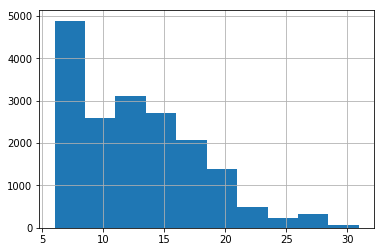

In [218]:
df_managers['int_rate'].hist()

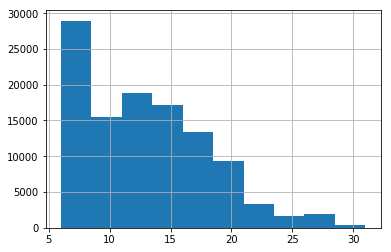

In [219]:
df_nonmanagers['int_rate'].hist()

## Work with dates

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

In [220]:
df_nonmanagers['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [221]:
df_nonmanagers['issue_d'] = pd.to_datetime(df_nonmanagers['issue_d'])
df_nonmanagers['issue_d'].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_d, dtype: datetime64[ns]

In [222]:
df_nonmanagers['issue_year'] = df_nonmanagers['issue_d'].dt.year
df_nonmanagers['issue_month'] = df_nonmanagers['issue_d'].dt.month
df_nonmanagers[['issue_year', 'issue_month']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,issue_year,issue_month
0,2018,12
1,2018,12
2,2018,12
3,2018,12
4,2018,12


# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
def convertLoadStatus(x_str):
  if(x_str == "Current" or x_str == "Fully Paid"):
    return 1;
  else:
    return 0;

In [0]:
df['loan_status_is_great'] = df['loan_status'].apply(convertLoadStatus)

In [0]:
def convertToInt(x_str):
  return int(x_str.strip(" months"))

In [0]:
df['term']=df['term'].apply(convertToInt);

In [0]:
def getMonth(x_str):
  index = str(x_str).find("-");
  if(index>=0):
    return x_str[:int(index)];
  else:
    return "empty"
def getYear(x_str):
  index = str(x_str).find("-")+1;
  if(index>=1):
    return x_str[int(index):];
  else:
    return "empty"


In [0]:
df['last_pymnt_d_month']=df['last_pymnt_d'].apply(getMonth)
df['last_pymnt_d_year']=df['last_pymnt_d'].apply(getYear)

In [229]:
print("months:\n",df['last_pymnt_d_month'].head(10), "\n\nyears:\n", df['last_pymnt_d_year'].head(10));

months:
 0    Apr
1    Apr
2    Apr
3    Apr
4    Apr
5    Apr
6    Apr
7    Apr
8    Apr
9    Apr
Name: last_pymnt_d_month, dtype: object 

years:
 0    2019
1    2019
2    2019
3    2019
4    2019
5    2019
6    2019
7    2019
8    2019
9    2019
Name: last_pymnt_d_year, dtype: object


# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

In [240]:
df_other_emp_title

0                                      unknown
1                                     security
2                               administrative
3                                      unknown
4                                         chef
5                                   postmaster
6                                     operator
7                           nursing supervisor
8                                      manager
9                             material handler
10                                     unknown
11                   instructional coordinator
12                                     unknown
13            financial relationship associate
14                         sale representative
15                          driver coordinator
16                               gas attendant
17    assistant athletic director of marketing
18                            sr sales manager
19                                 casino host
Name: emp_title, dtype: object

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01